In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels import api as sm
import plotly.subplots as sp
import math
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import SGD

warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")

In [214]:
df = pd.read_csv('/Users/vaibhav/Desktop/Deep Learning/Assignment 3/data/AAPL_2006-01-01_to_2018-01-01.csv')
df.head() 

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [215]:
df.info()

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64


In [216]:
df.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,64.673309,65.256833,64.033445,64.662892,1.311457e+08
std,44.524927,44.811772,44.230829,44.536448,1.018560e+08
min,7.390000,7.560000,7.170000,7.240000,1.147592e+07
25%,23.425000,23.805000,23.015000,23.420000,5.292889e+07
50%,57.860000,58.460000,57.320000,57.920000,1.066271e+08
75%,99.165000,100.275000,98.385000,99.480000,1.798977e+08
max,175.110000,177.200000,174.860000,176.420000,8.432640e+08


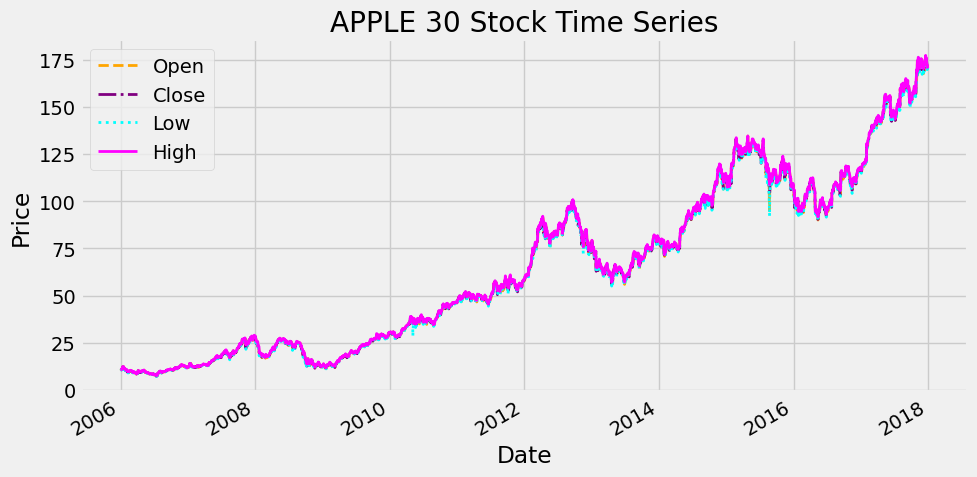

In [217]:
df["Date"] = pd.to_datetime(df["Date"])
df_AAPL = df[df['Name'] == 'AAPL']

plt.figure(figsize=(10, 5))

plt.plot(df_AAPL['Date'], df_AAPL['Open'], color='orange', label='Open', linewidth=2, linestyle='--')
plt.plot(df_AAPL['Date'], df_AAPL['Close'], color='purple', label='Close', linewidth=2, linestyle='-.')
plt.plot(df_AAPL['Date'], df_AAPL['Low'], color='cyan', label='Low', linewidth=2, linestyle=':')
plt.plot(df_AAPL['Date'], df_AAPL['High'], color='magenta', label='High', linewidth=2, linestyle='-')

plt.title("APPLE 30 Stock Time Series")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

plt.xticks(rotation=30, ha='right')  
plt.tight_layout()
plt.show()

In [218]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

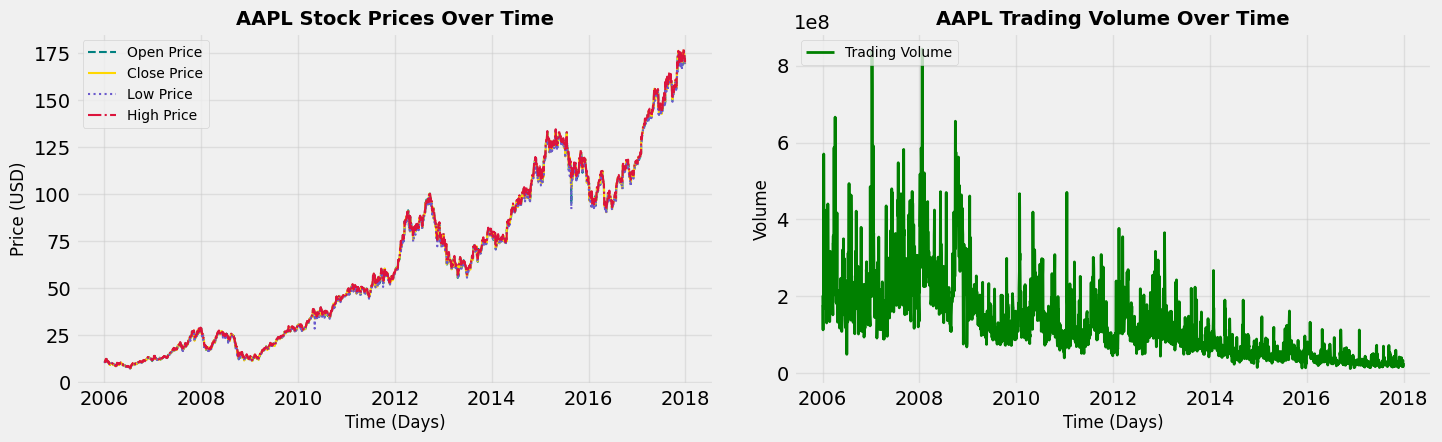

In [219]:
plt.figure(figsize=(15, 5))

# Subplot 1: Stock Prices
plt.subplot(1, 2, 1)
plt.plot(df['Open'], color='teal', label='Open Price', linestyle='--', linewidth=1.5)
plt.plot(df['Close'], color='gold', label='Close Price', linestyle='-', linewidth=1.5)
plt.plot(df['Low'], color='slateblue', label='Low Price', linestyle=':', linewidth=1.5)
plt.plot(df['High'], color='crimson', label='High Price', linestyle='-.', linewidth=1.5)
plt.title('AAPL Stock Prices Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Time (Days)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(alpha=0.5)

# Subplot 2: Trading Volume
plt.subplot(1, 2, 2)
plt.plot(df['Volume'], color='green', label='Trading Volume', linestyle='-', linewidth=2)
plt.title('AAPL Trading Volume Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Time (Days)', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(alpha=0.5)

# Adjust layout and display
plt.tight_layout(pad=2)
plt.show()

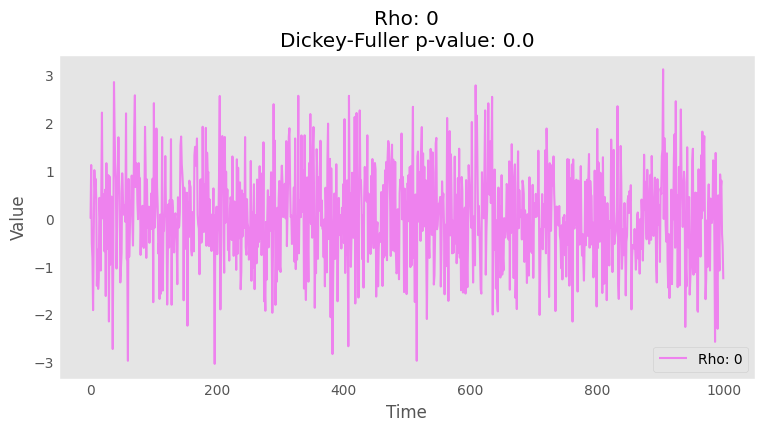

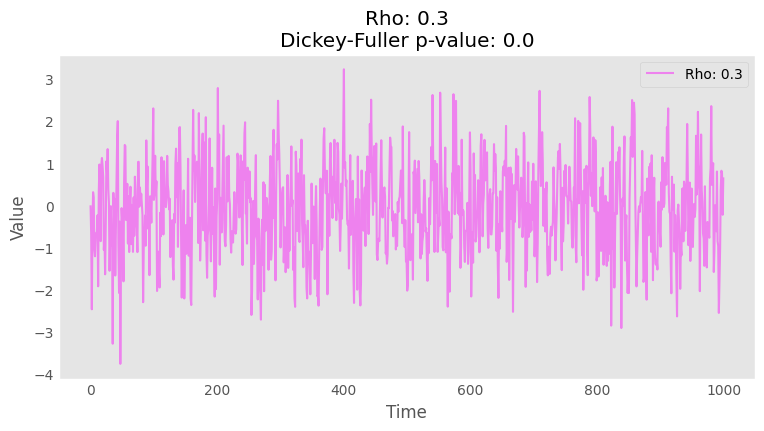

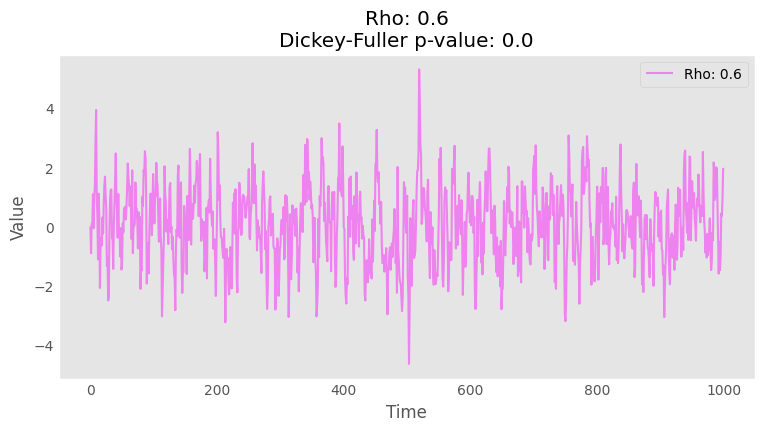

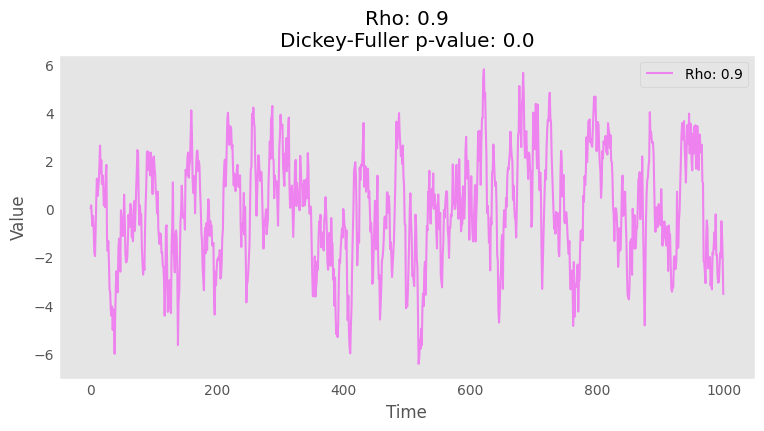

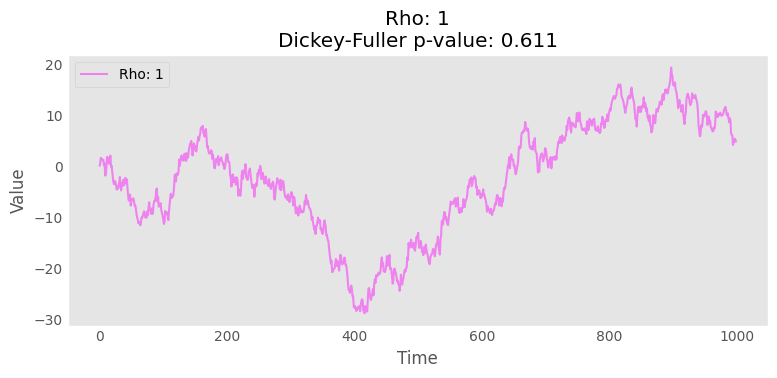

In [220]:
def plotProcess(n_samples=1000, rho=0): 
    w = np.random.normal(size=n_samples)
    x = np.zeros(n_samples)  
    
    for t in range(1, n_samples):  
        x[t] = rho * x[t-1] + w[t]

    with plt.style.context('ggplot'):  
        plt.figure(figsize=(8, 4)) 
        plt.plot(x, label=f"Rho: {rho}", linewidth=1.5, color='violet')  
        plt.title(f"Rho: {rho}\nDickey-Fuller p-value: {round(sm.tsa.stattools.adfuller(x)[1], 3)}")
        plt.xlabel("Time")
        plt.ylabel("Value")
        plt.legend()
        plt.grid()

for rho in [0, 0.3, 0.6, 0.9, 1]:
    plotProcess(rho=rho)

plt.tight_layout() 
plt.show()

In [221]:
df = df.drop(['Name'], axis=1)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036
2006-01-04,10.73,10.85,10.64,10.71,155225609
2006-01-05,10.69,10.70,10.54,10.63,112396081
2006-01-06,10.75,10.96,10.65,10.90,176139334
2006-01-09,10.96,11.03,10.82,10.86,168861224


In [222]:
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error is : {}.".format(rmse))

In [223]:
train = df[:'2016'].iloc[:,1:2].values
test = df['2017':].iloc[:,1:2].values

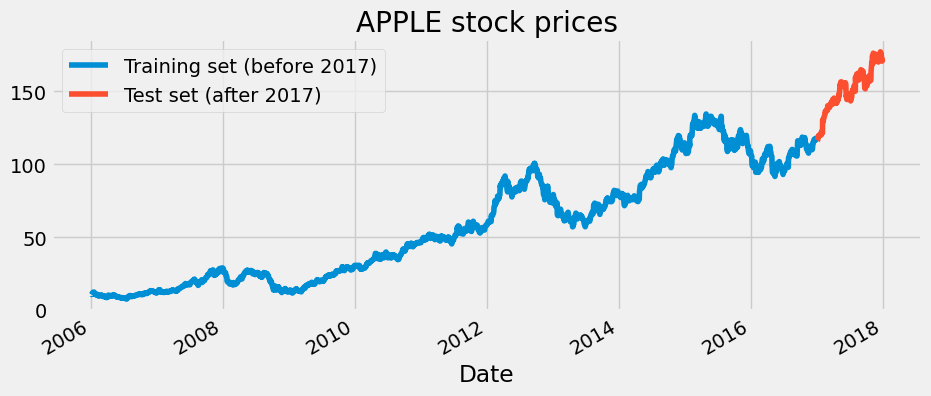

In [230]:
df["High"][:'2016'].plot(figsize=(10,4), legend=True)
df["High"]["2017":].plot(figsize=(10,4), legend=True)
plt.legend(["Training set (before 2017)", "Test set (after 2017)"])
plt.title("APPLE stock prices")
plt.show()

In [231]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [232]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [233]:
time_step = 60
X_train, y_train = create_dataset(train_scaled, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [234]:
def prepare_and_predict(model, data, scaler, time_step):
    
    inputs = data["High"][len(data) - len(test) - time_step:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)

    X_test = []
    for i in range(time_step, len(inputs)):
        X_test.append(inputs[i-time_step:i, 0])
    
    X_test = np.array(X_test)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    predicted_prices = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)

    return predicted_prices

In [235]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))  
LSTM_model.add(Dropout(0.3)) 
LSTM_model.add(LSTM(units=100, return_sequences=True))  
LSTM_model.add(Dropout(0.3))  
LSTM_model.add(LSTM(units=100, return_sequences=False))  
LSTM_model.add(Dropout(0.3))  
LSTM_model.add(Dense(units=1))

In [246]:
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')

LSTM_model.fit(X_train, y_train, epochs=25, batch_size=32) 

Epoch 1/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 0.0022
Epoch 2/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0013
Epoch 3/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0013
Epoch 4/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0018
Epoch 5/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0014
Epoch 6/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0012
Epoch 7/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0012
Epoch 8/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0012
Epoch 9/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0011
Epoch 10/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0012
Epoch 11/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0015
Epoch 12/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0015
Epoch 13/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0010
Epoch 14/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0012
Epoch 15/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0011
Epoc

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


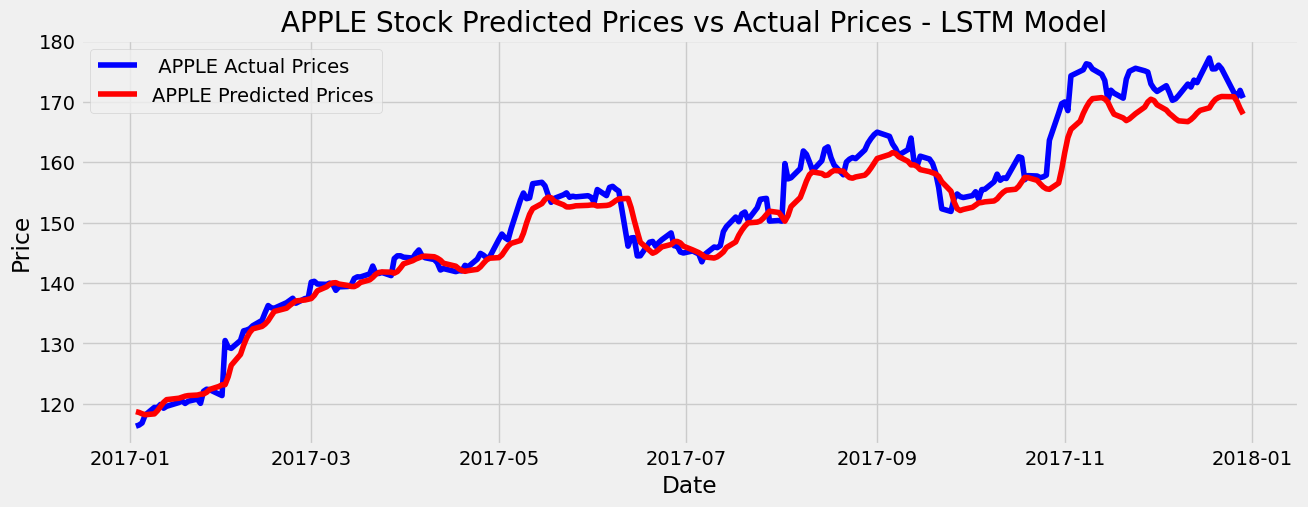

the root mean squared error is : 3.320227061119895.


In [247]:
predicted_prices = prepare_and_predict(LSTM_model, df, scaler, time_step)

plt.figure(figsize=(14, 5))
plt.plot(df.loc['2017':].index, test, color='blue', label=' APPLE Actual Prices')
plt.plot(df.loc['2017':].index, predicted_prices, color='red', label='APPLE Predicted Prices')
plt.title(" APPLE Stock Predicted Prices vs Actual Prices - LSTM Model")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

return_rmse(test, predicted_prices)

Building and Evaluating the RNN Model

In [248]:
RNN_model = Sequential()
RNN_model.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1))) 
RNN_model.add(Dropout(0.3))  
RNN_model.add(SimpleRNN(units=100, return_sequences=True))  
RNN_model.add(Dropout(0.3))  
RNN_model.add(SimpleRNN(units=100, return_sequences=False)) 
RNN_model.add(Dropout(0.3))  
RNN_model.add(Dense(units=1))

In [249]:
RNN_model.compile(optimizer='adam', loss='mean_squared_error')

RNN_model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4513
Epoch 2/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0902
Epoch 3/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0521
Epoch 4/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0322
Epoch 5/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0197
Epoch 6/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0156
Epoch 7/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0120
Epoch 8/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0116
Epoch 9/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0105
Epoch 10/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0073
Epoch 11/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0065
Epoch 12/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0052
Epoch 13/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0056
Epoch 14/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0047
Epoch 15/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0042
Epoc

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


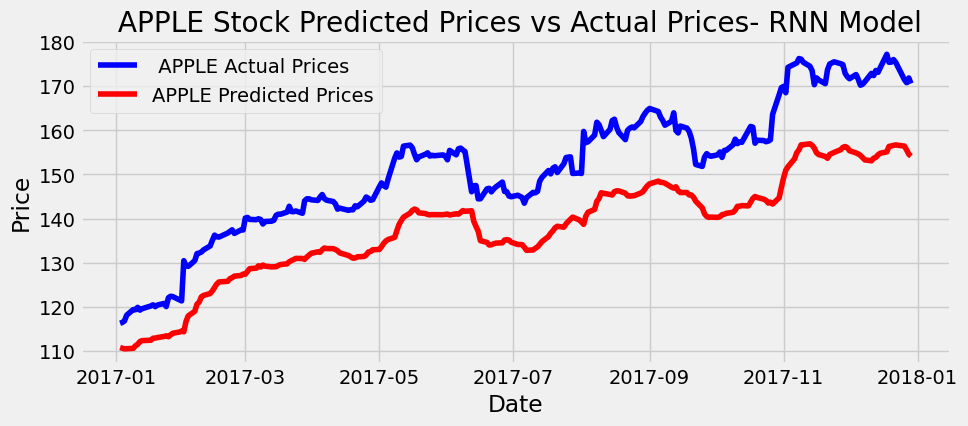

the root mean squared error is : 13.93553615810324.


In [250]:
predicted_prices = prepare_and_predict(RNN_model, df, scaler, time_step)

real_prices = df['2017':].iloc[:, 1:2].values  

plt.figure(figsize=(10, 4))
plt.plot(df.loc['2017':].index, test, color='blue', label=' APPLE Actual Prices')
plt.plot(df.loc['2017':].index, predicted_prices, color='red', label='APPLE Predicted Prices')
plt.title(" APPLE Stock Predicted Prices vs Actual Prices- RNN Model")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

plt.show()

return_rmse(test, predicted_prices)

Building and Evaluating the GRU Model

In [251]:
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    return model

GRU_model = create_gru_model((X_train.shape[1], 1))

In [252]:
GRU_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False), 
                  loss='mean_squared_error')

GRU_model.fit(X_train, y_train, epochs=25, batch_size=150) 

Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - loss: 0.1173
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - loss: 0.0275
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - loss: 0.0055
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - loss: 0.0043
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - loss: 0.0037
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - loss: 0.0033
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - loss: 0.0032
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - loss: 0.0032
Epoch 9/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - loss: 0.0032
Epoch 10/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - loss: 0.0030
Epoch 11/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - loss: 0.0026
Epoch 12/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - loss: 0.0030
Epoch 13/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - loss: 0.0028
Epoch 14/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - loss: 0.0025
Epoch 15/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - lo

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


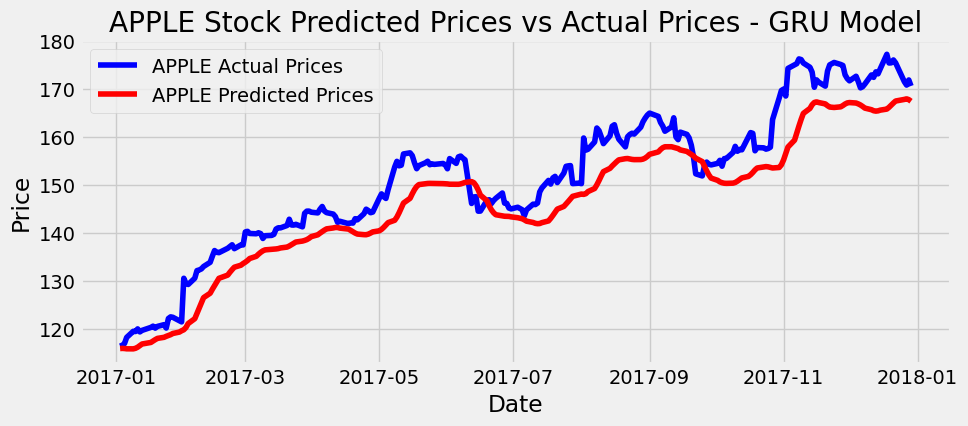

the root mean squared error is : 6.238007166114487.


In [253]:
predicted_prices = prepare_and_predict(GRU_model, df, scaler, time_step)

real_prices = df['2017':].iloc[:, 1:2].values  

plt.figure(figsize=(10, 4))
plt.plot(df.loc['2017':].index, real_prices, color='blue', label='APPLE Actual Prices')  
plt.plot(df.loc['2017':].index, predicted_prices, color='red', label='APPLE Predicted Prices')  
plt.title("APPLE Stock Predicted Prices vs Actual Prices - GRU Model")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

return_rmse(test, predicted_prices)